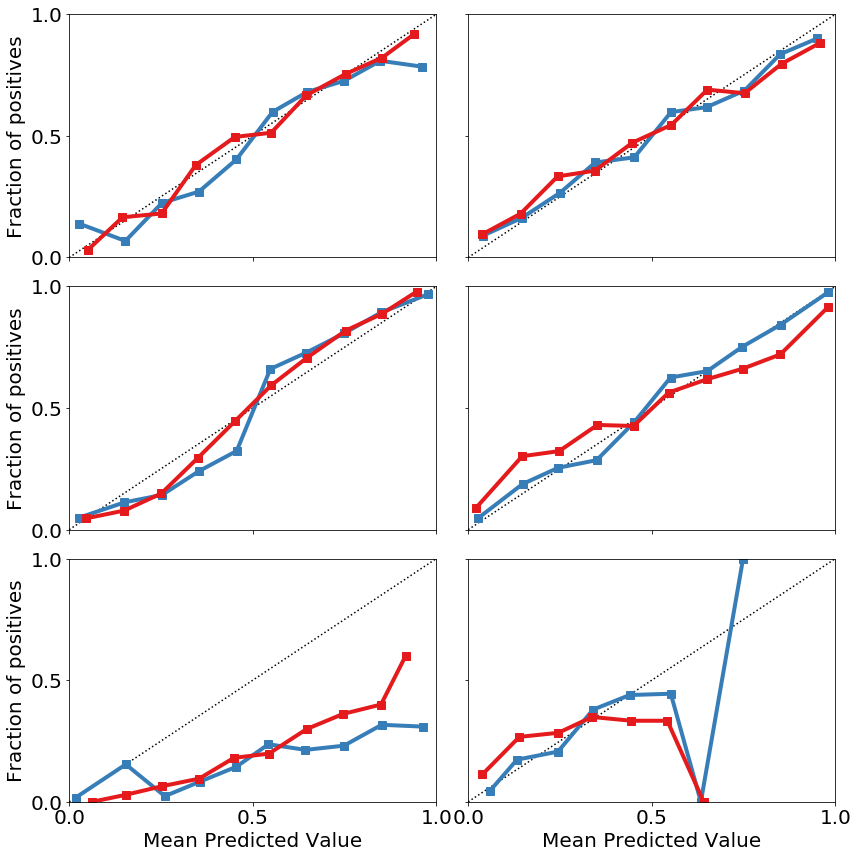

In [35]:
import dill
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sklearn.calibration import calibration_curve
MONTHS = 12


def get_model_info(m_string):
    parts = m_string.split(".")[0].split("_")
    algo = parts[2]
    softmax = parts[3]
    window_size = parts[4].split("-")[1]
    emb_size = parts[5].split("-")[1]
    return "{}, {}, window: {}, embedding: {}".format(algo.upper(), softmax.upper(), window_size, emb_size)


x_months = [0,1,2,3,4]
x_months_ticks = ["0", "1", "3", "6", "12"]

matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams['figure.figsize'] = (12.0, 12)

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, sharex='col', sharey='row')
plt.setp(((ax1, ax2), (ax3, ax4), (ax5, ax6)), xticks=[0, 0.5, 1], yticks=[0, 0.5, 1], xlim=[0, 1], ylim=[0, 1])

# Breast cancer
counts_elasticnet_preds = dill.load(open('../breast_cancer/log/breast_cancer_counts_elasticnet_results.dill', 'rb'))
vector_elasticnet_preds = dill.load(open('../breast_cancer/log/breast_cancer_vectors_elasticnet_results.dill', 'rb'))['vectors_patient2vec_pvdbow_hs_win-5_emb-100.dill']
counts_preds = dill.load(open('../breast_cancer/log/breast_cancer_counts_monthly_optimized_results.dill', 'rb'))
vector_preds = dill.load(open('../breast_cancer/log/breast_cancer_vectors_monthly_optimized_results.dill', 'rb'))['vectors_patient2vec_pvdbow_hs_win-30_emb-100.dill']

prob_pos_ec = counts_elasticnet_preds[MONTHS]['pred_y'][:, 1]
fraction_of_positives_ec, mean_predicted_value_ec = calibration_curve(counts_elasticnet_preds[MONTHS]['true_y'], prob_pos_ec, n_bins=10)
prob_pos_ev = vector_elasticnet_preds[MONTHS]['pred_y'][:, 1]
fraction_of_positives_ev, mean_predicted_value_ev = calibration_curve(vector_elasticnet_preds[MONTHS]['true_y'], prob_pos_ev, n_bins=10)

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax1.plot(mean_predicted_value_ec, fraction_of_positives_ec, "s-", label="Classical input", linewidth=4.0, ms=8, color='#377eb8')
ax1.plot(mean_predicted_value_ev, fraction_of_positives_ev, "s-", label="Vector input", linewidth=4.0, ms=8, color='#E41A1C')
ax1.set_ylabel('Fraction of positives')

prob_pos_c = counts_preds[MONTHS]['pred_y'][:, 1]
fraction_of_positives_c, mean_predicted_value_c = calibration_curve(counts_preds[MONTHS]['true_y'], prob_pos_c, n_bins=10)
prob_pos_v = vector_preds[MONTHS]['pred_y'][:, 1]
fraction_of_positives_v, mean_predicted_value_v = calibration_curve(vector_preds[MONTHS]['true_y'], prob_pos_v, n_bins=10)

ax2.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax2.plot(mean_predicted_value_c, fraction_of_positives_c, "s-", label="Classical input", linewidth=4.0, ms=8, color='#377eb8')
ax2.plot(mean_predicted_value_v, fraction_of_positives_v, "s-", label="Vector input", linewidth=4.0, ms=8, color='#E41A1C')


# Diabetes treatment
counts_elasticnet_preds = dill.load(open('../diabetes/log/diabetes_counts_elasticnet_results.dill', 'rb'))
vector_elasticnet_preds = dill.load(open('../diabetes/log/diabetes_vectors_elasticnet_results.dill', 'rb'))['vectors_patient2vec_pvdbow_hs_win-5_emb-300.dill']
counts_preds = dill.load(open('../diabetes/log/diabetes_counts_monthly_optimized_results.dill', 'rb'))
vector_preds = dill.load(open('../diabetes/log/diabetes_vectors_monthly_optimized_results.dill', 'rb'))['vectors_patient2vec_pvdbow_hs_win-50_emb-100.dill']

prob_pos_ec = counts_elasticnet_preds[MONTHS]['pred_y'][:, 1]
fraction_of_positives_ec, mean_predicted_value_ec = calibration_curve(counts_elasticnet_preds[MONTHS]['true_y'], prob_pos_ec, n_bins=10)
prob_pos_ev = vector_elasticnet_preds[MONTHS]['pred_y'][:, 1]
fraction_of_positives_ev, mean_predicted_value_ev = calibration_curve(vector_elasticnet_preds[MONTHS]['true_y'], prob_pos_ev, n_bins=10)

ax3.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax3.plot(mean_predicted_value_ec, fraction_of_positives_ec, "s-", label="Classical input", linewidth=4.0, ms=8, color='#377eb8')
ax3.plot(mean_predicted_value_ev, fraction_of_positives_ev, "s-", label="Vector input", linewidth=4.0, ms=8, color='#E41A1C')
ax3.set_ylabel('Fraction of positives')

prob_pos_c = counts_preds[MONTHS]['pred_y'][:, 1]
fraction_of_positives_c, mean_predicted_value_c = calibration_curve(counts_preds[MONTHS]['true_y'], prob_pos_c, n_bins=10)
prob_pos_v = vector_preds[MONTHS]['pred_y'][:, 1]
fraction_of_positives_v, mean_predicted_value_v = calibration_curve(vector_preds[MONTHS]['true_y'], prob_pos_v, n_bins=10)

ax4.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax4.plot(mean_predicted_value_c, fraction_of_positives_c, "s-", label="Classical input", linewidth=4.0, ms=8, color='#377eb8')
ax4.plot(mean_predicted_value_v, fraction_of_positives_v, "s-", label="Vector input", linewidth=4.0, ms=8, color='#E41A1C')


# lung cancer
counts_elasticnet_preds = dill.load(open('../lung_cancer/log/lung_cancer_counts_elasticnet_results.dill', 'rb'))
vector_elasticnet_preds = dill.load(open('../lung_cancer/log/lung_cancer_vectors_elasticnet_results.dill', 'rb'))['vectors_patient2vec_pvdbow_hs_win-5_emb-300.dill']
counts_preds = dill.load(open('../lung_cancer/log/lung_cancer_counts_monthly_optimized_results.dill', 'rb'))
vector_preds = dill.load(open('../lung_cancer/log/lung_cancer_vectors_monthly_optimized_results.dill', 'rb'))['vectors_patient2vec_pvdbow_hs_win-50_emb-100.dill']

prob_pos_ec = counts_elasticnet_preds[MONTHS]['pred_y'][:, 1]
fraction_of_positives_ec, mean_predicted_value_ec = calibration_curve(counts_elasticnet_preds[MONTHS]['true_y'], prob_pos_ec, n_bins=10)
prob_pos_ev = vector_elasticnet_preds[MONTHS]['pred_y'][:, 1]
fraction_of_positives_ev, mean_predicted_value_ev = calibration_curve(vector_elasticnet_preds[MONTHS]['true_y'], prob_pos_ev, n_bins=10)

ax5.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax5.plot(mean_predicted_value_ec, fraction_of_positives_ec, "s-", label="Classical input", linewidth=4.0, ms=8, color='#377eb8')
ax5.plot(mean_predicted_value_ev, fraction_of_positives_ev, "s-", label="Vector input", linewidth=4.0, ms=8, color='#E41A1C')
ax5.set_xlabel('Mean Predicted Value')
ax5.set_ylabel('Fraction of positives')


prob_pos_c = counts_preds[MONTHS]['pred_y'][:, 1]
fraction_of_positives_c, mean_predicted_value_c = calibration_curve(counts_preds[MONTHS]['true_y'], prob_pos_c, n_bins=10)
prob_pos_v = vector_preds[MONTHS]['pred_y'][:, 1]
fraction_of_positives_v, mean_predicted_value_v = calibration_curve(vector_preds[MONTHS]['true_y'], prob_pos_v, n_bins=10)

ax6.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax6.plot(mean_predicted_value_c, fraction_of_positives_c, "s-", label="Classical input", linewidth=4.0, ms=8, color='#377eb8')
ax6.plot(mean_predicted_value_v, fraction_of_positives_v, "s-", label="Vector input", linewidth=4.0, ms=8, color='#E41A1C')
ax6.set_xlabel('Mean Predicted Value')

plt.tight_layout(pad=0.5, w_pad=0) #, h_pad=0)

f.savefig("images/all_calibration.pdf", bbox_inches='tight')
plt.show()